In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

In [13]:
wf=np.load('waterfalls/wfall_11.0_20.0_2.0_5.0_5.0_128.npz',allow_pickle=True)['wfalls']
## for this, let's merge them. In other words, 11 nights worht of observations in one go
wf=np.vstack(wf)

maxfreq=40
freq = np.arange(10,maxfreq,0.25)
wf = wf[:,:len(freq)]
wf.shape
print(wf.shape)

(4092, 5)


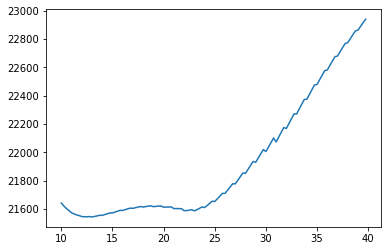

In [338]:
we = (freq/freq[len(freq)//2])**2.70
wfw = wf*we[None,:]
plt.plot(freq,wfw.mean(axis=0))


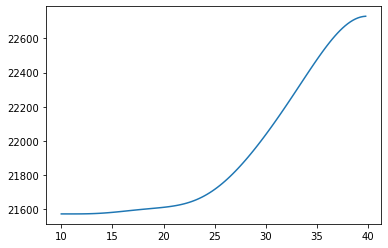

In [339]:
wfw = scipy.ndimage.gaussian_filter(wfw,[0,12])
plt.plot(freq,wfw.mean(axis=0))

In [340]:
cov_from_mean_subtracted = False
if cov_from_mean_subtracted:
    wfw_nomean =  wfw-wfw.mean(axis=0)
    cov = np.cov(wfw_nomean,rowvar=False)
else:
    cov = np.array([np.outer(t,t) for t in wfw]).mean(axis=0)

In [341]:
eva,evec = np.linalg.eigh(cov)
endx = np.argsort(eva)[::-1]

[]

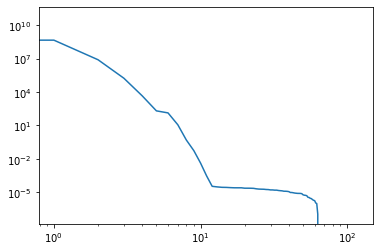

In [342]:
plt.plot(eva[endx])
plt.loglog()

(-0.25, 0.25)

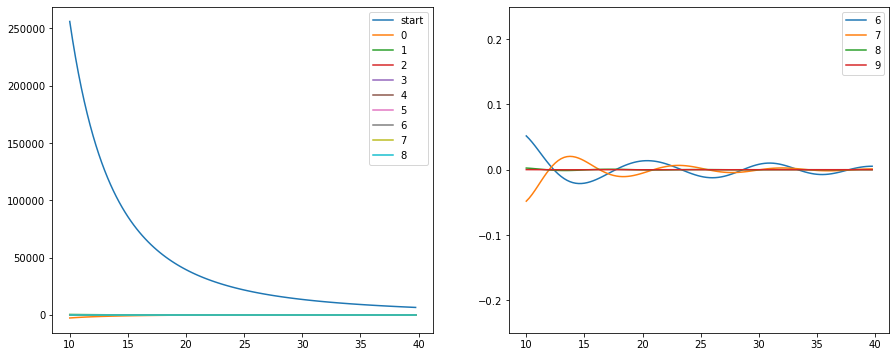

In [345]:
tosub = wfw.copy()
Nmax=9
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
ax1.plot(freq,tosub.mean(axis=0)/we,label='start')
for ii,ndx in enumerate(endx[:Nmax]):
    vec = evec[:,ndx]
    norm = np.dot(vec,vec)
    wex = (tosub*vec[None,:]).sum(axis=1)/norm
    tosub -= np.outer(wex,vec)
    weare = tosub.mean(axis=0)
    ax1.plot(freq, weare/we,label=str(ii))
    if ii>Nmax-5:
        ax2.plot(freq, weare/we,label=str(ii+1))

ax1.legend()
ax2.legend()
ax2.set_ylim(-0.25,0.25)

In [346]:
import os
os.environ['ARES']='/home/anze/work/BMX/ares'
import ares

sim = ares.simulations.Global21cm()
sim.run()
nu = 1420/(1+sim.history['z'])
from scipy.interpolate import interp1d
gsignal=interp1d(nu,sim.history['dTb'])(freq)/1000

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Uniform Backgrounds                                                                                  ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

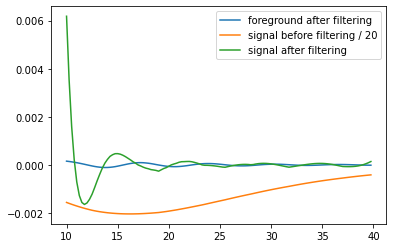

In [347]:
gsigwe = gsignal*we
plt.plot(freq,weare/we,label='foreground after filtering')
plt.plot(freq,gsigwe/we/20, label='signal before filtering / 20')
for ii,ndx in enumerate(endx[:Nmax]):
    vec = evec[:,ndx]
    norm = np.dot(vec,vec)
    wex = np.dot(gsigwe,vec)/norm
    gsigwe -= wex*vec
    
plt.plot(freq,gsigwe/we, label='signal after filtering')
plt.legend()
#plt.ylim(-0.01,0.01)